# --------------Table of Contents----------------
## 1. Import libraries and data
## 2. See Part 1
## 3. See Part 1
## 4. See Part 1
## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. '
## 6. Create an appropriate visualization to show the distribution of profiles.
## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
## 8. Compare your customer profiles with regions and departments.
## 9. Produce suitable charts to illustrate your results and export them in your project folder.
## 10. Tidy up your script, export your final data set, and save your notebook.

# -------------Questions---------------------

## 1. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path shortcut

path = r'/Users/lynnsey/Desktop/Bootcamp/Tasks/Immersion/Task 4/07-20-2023 Instacart Basket Analysis'

In [3]:
# Import small subset of data

small = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small_subset_all.pkl'))

In [4]:
# Check to see if imported correctly

small.head(60)

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependants,marital_status,income,_merge,region,type_spender,age_range,parent,income_range,department_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,both,South,not low spender,middle aged,parent,low,drinks
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,both,South,not low spender,middle aged,parent,low,drinks
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,both,South,not low spender,middle aged,parent,low,drinks
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,3,married,40423,both,South,not low spender,middle aged,parent,low,drinks
10,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,both,South,not low spender,middle aged,parent,low,food
12,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,3,married,40423,both,South,not low spender,middle aged,parent,low,food
13,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,...,3,married,40423,both,South,not low spender,middle aged,parent,low,food
19,2295261,1,9,1,16,0.0,12427,6,1,Original Beef Jerky,...,3,married,40423,both,South,not low spender,middle aged,parent,low,food
21,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,both,South,not low spender,middle aged,parent,low,food
22,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,3,married,40423,both,South,not low spender,middle aged,parent,low,food


In [5]:
small.shape

(9288468, 36)

## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### Did some descriptive stats and created a subset in Part 1.

#### Create a bar chart of 'age_group' income

In [6]:
# Take sample of just columns of interest

age_income = small[['age_range', 'income']]

Text(0.5, 1.0, 'Age related Income')

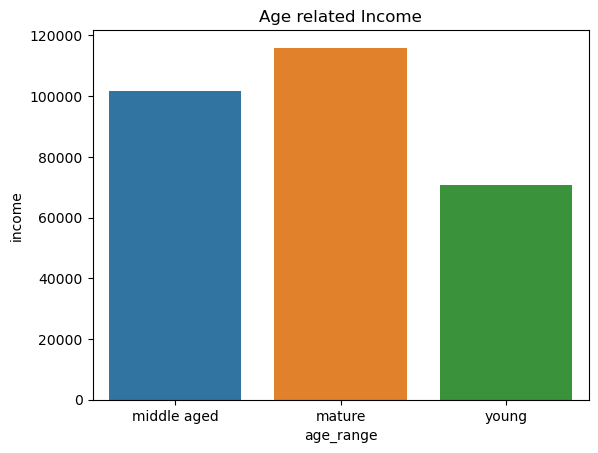

In [67]:
# Create bar chart

sns.barplot(x='age_range', y='income',data=age_income)
plt.title("Age related Income")

#### This shows that I can link age and income through a profile.  Let's check now to see if there is a link between age and whether someone has dependants or not.

In [9]:
# Take sample of just columns of interest

age_par = small[['age_range', 'parent']]

In [10]:
# Create a crosstab of 'age_range' and 'parent'

age_par_cross = pd.crosstab(age_par['age_range'], age_par['parent'], dropna = False)

In [11]:
age_par_cross

parent,not a parent,parent
age_range,,
mature,605788,1852200
middle aged,1279812,3805592
young,433720,1311356


Text(0, 0.5, 'Number of Orders')

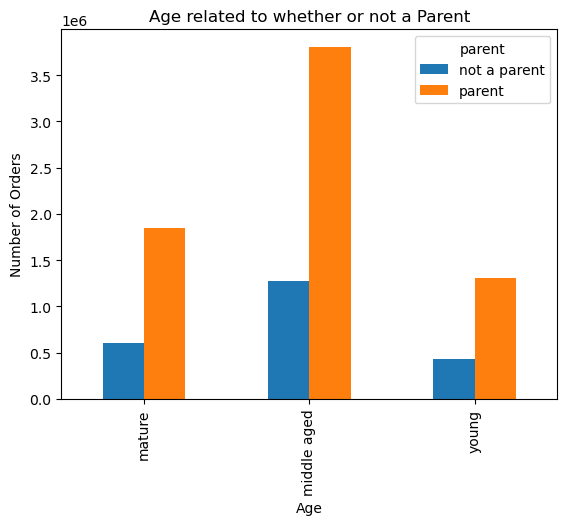

In [12]:
# Create a bar chart

bar_age_par = age_par_cross.plot(kind="bar")
plt.title("Age related to whether or not a Parent")
plt.xlabel("Age")
plt.ylabel("Number of Orders")

#### This shows us that all age groups have a higher number of parents than not.  There doesn't seem to be much of a difference ratio-wise. Let's do the same thing but now look at income versus whether or not they are a parent.

In [70]:
# Export bar chart as an image

bar_age_par.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_user_profiles.png'), bbox_inches='tight')

In [13]:
# Take sample of just columns of interest

par_inc = small[['parent', 'income_range']]

In [14]:
# Create a crosstab of 'parent' and 'income_range'

par_inc_cross = pd.crosstab(par_inc['parent'], par_inc['income_range'], dropna = False)

In [15]:
par_inc_cross

income_range,average,high,low
parent,,,
not a parent,1437112,628426,253782
parent,4358053,1855847,755248


Text(0, 0.5, 'Number of Orders')

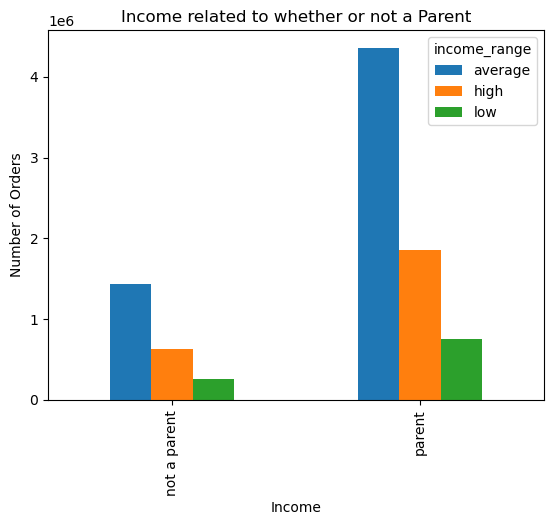

In [16]:
# Create a bar chart

bar_par_inc = par_inc_cross.plot(kind="bar")
plt.title("Income related to whether or not a Parent")
plt.xlabel("Income")
plt.ylabel("Number of Orders")

In [71]:
# Export bar chart as an image

bar_par_inc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_parent.png'), bbox_inches='tight')

#### It looks like the trends are similar for income in the 'parent' and 'not parent' column.

### Further exploration to see whether age, income or parental status affects what department categories they buy from.



In [17]:
# Create a crosstab for 'department_group'

dep_age = pd.crosstab(small['age_range'], small['department_group'], dropna = False)

In [18]:
dep_age

department_group,babies,drinks,food,household,misc,personal care,pets
age_range,,,,,,,
mature,31726,216254,2102786,55996,10481,33296,7449
middle aged,68047,447459,4348642,114874,21538,70022,14822
young,23337,151741,1494182,38845,7703,23859,5409


Text(0, 0.5, 'Number of Orders')

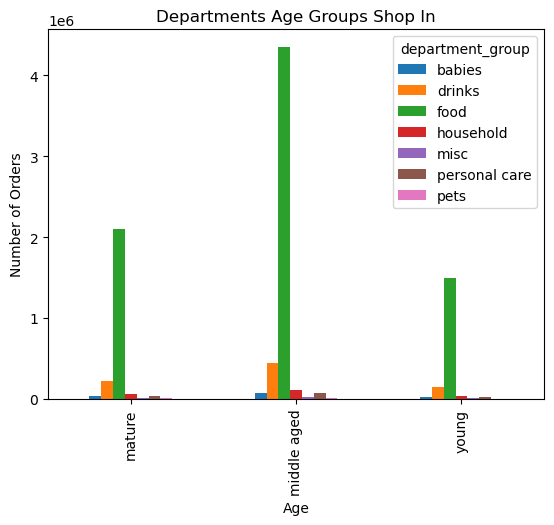

In [19]:
# Create a bar chart

bar_dep_age = dep_age.plot(kind="bar")
plt.title("Departments Age Groups Shop In")
plt.xlabel("Age")
plt.ylabel("Number of Orders")

In [72]:
# Export bar chart as an image

bar_dep_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dep.png'), bbox_inches='tight')

### They all shop for food at much higher rates.  But let's remove food to see if we can see anything valuable for the other categories.



In [20]:
# Drop food

dep_age_no_food = dep_age.drop(columns = ['food'])

Text(0, 0.5, 'Number of Orders')

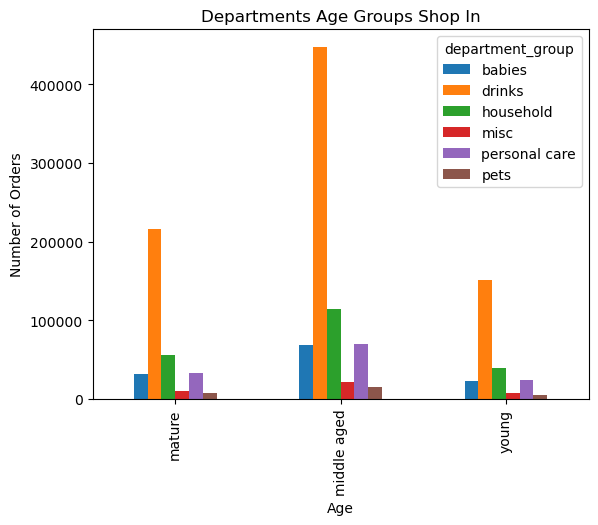

In [21]:
# Create a bar chart

bar_dep_age_no_food = dep_age_no_food.plot(kind="bar")
plt.title("Departments Age Groups Shop In")
plt.xlabel("Age")
plt.ylabel("Number of Orders")

In [73]:
# Export bar chart as an image

bar_dep_age_no_food.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dep_no_food.png'), bbox_inches='tight')

### The trends seems similar still by age.  Let's try by parent or not parent.

In [22]:
# Create a crosstab for 'department_group'

dep_par = pd.crosstab(small['parent'], small['department_group'], dropna = False)

In [23]:
dep_par

department_group,babies,drinks,food,household,misc,personal care,pets
parent,,,,,,,
not a parent,30863,204565,1984041,51151,9845,31741,7114
parent,92247,610889,5961569,158564,29877,95436,20566


Text(0, 0.5, 'Number of Orders')

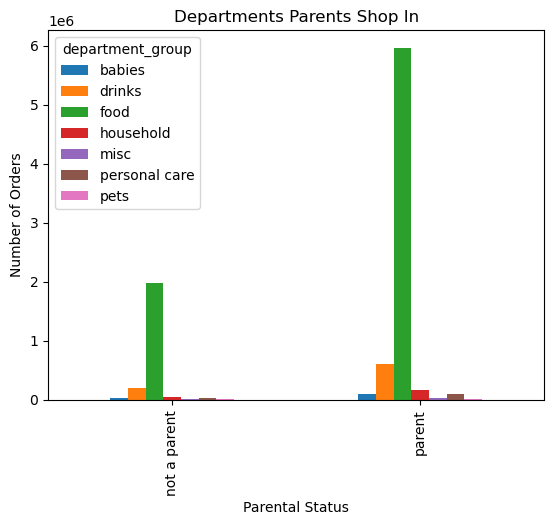

In [24]:
# Create a bar chart

bar_dep_par = dep_par.plot(kind="bar")
plt.title("Departments Parents Shop In")
plt.xlabel("Parental Status")
plt.ylabel("Number of Orders")

In [74]:
# Export bar chart as an image

bar_dep_par.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_department.png'), bbox_inches='tight')

### Again, let's remove food.

In [25]:
# Drop food

dep_par_no_food = dep_par.drop(columns = ['food'])

Text(0, 0.5, 'Number of Orders')

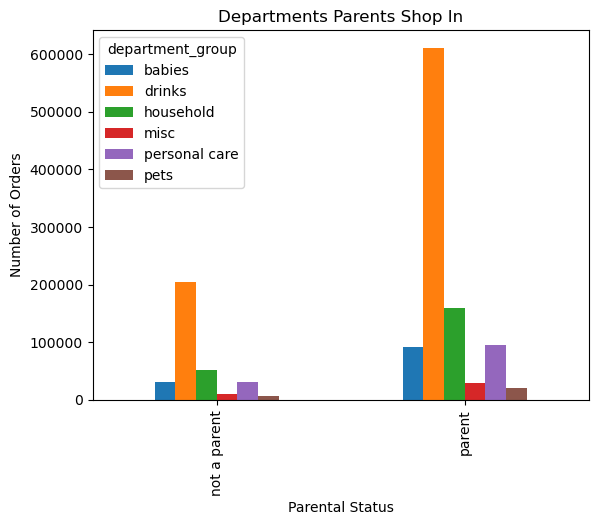

In [26]:
# Create a bar chart

bar_dep_par = dep_par_no_food.plot(kind="bar")
plt.title("Departments Parents Shop In")
plt.xlabel("Parental Status")
plt.ylabel("Number of Orders")

In [75]:
# Export bar chart as an image

bar_dep_par.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_department_no_food.png'), bbox_inches='tight')

### Again, the trends look similar.  Parents are a much bigger population, but it looks like they are just more apt to buy more in every department, not necessarily one in particular.

### From my exploration I would link the income level to age, so there can just be one indicator that encapsulates both age and income.  Then I would create separate categories for whether they are a parent or not.

### Profiles:
#### Young Parent
#### Middle-aged Parent
#### Mature Parent
#### Young No Children
#### Middle-aged No Children
#### Mature No Children

### Now I need to create a profile variable for each customer based on the profiles I created above.

In [27]:
# Import entire dataset

all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'All_final_version.pkl'))

In [28]:
# Check shape of dataset

all.shape

(30964564, 37)

In [29]:
# Want to see all columns

pd.set_option('display.max_columns', None)

In [30]:
all.head()

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,type_spender,age_group,age_range,parent,income_range,department_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks


In [31]:
# Create a 'young parent' profile

all.loc[(all['age_range'] == 'young') & (all['parent'] == 'parent'), 'user_profile'] = 'young parent'

In [32]:
# Create a 'middle-aged parent' profile

all.loc[(all['age_range'] == 'middle aged') & (all['parent'] == 'parent'), 'user_profile'] = 'middle-aged parent'

In [33]:
# Create a 'mature parent' profile

all.loc[(all['age_range'] == 'mature') & (all['parent'] == 'parent'), 'user_profile'] = 'mature parent'

In [34]:
# Create a 'young no children' profile

all.loc[(all['age_range'] == 'young') & (all['parent'] == 'not a parent'), 'user_profile'] = 'young no children'

In [35]:
# Create a 'middle-aged no children' profile

all.loc[(all['age_range'] == 'middle aged') & (all['parent'] == 'not a parent'), 'user_profile'] = 'middle-aged no children'

In [36]:
# Create a 'mature no children' profile

all.loc[(all['age_range'] == 'mature') & (all['parent'] == 'not a parent'), 'user_profile'] = 'mature no children'

In [37]:
# Check frequency of each profile and check for missing values

all['user_profile'].value_counts(dropna = False)

middle-aged parent         12681312
mature parent               6173586
young parent                4369985
middle-aged no children     4270105
mature no children          2021958
young no children           1447618
Name: user_profile, dtype: int64

In [38]:
# Add together to make sure adds up to amount of rows in all dataframe (30964564)

y = 12681312 + 6173586 + 4369985 + 4270105 + 2021958 + 1447618

In [39]:
y

30964564

#### The check is correct; I have successfully create a profile variable.

## 6. Create an appropriate visualization to show the distribution of profiles.

Text(0, 0.5, 'Number of Orders')

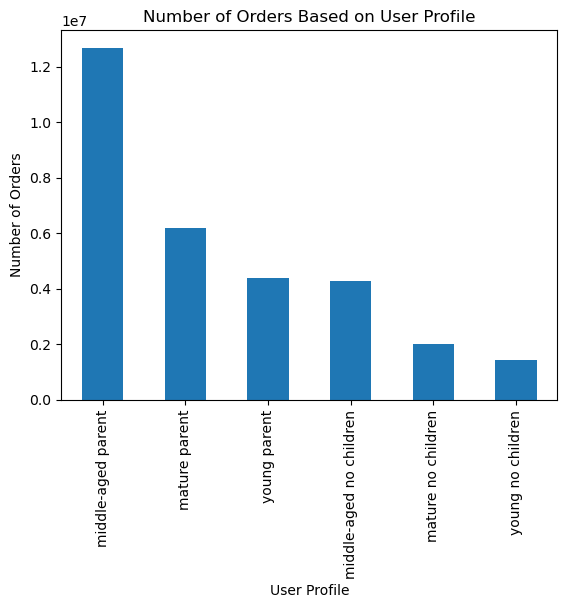

In [40]:
# Create bar chart

bar_all = all['user_profile'].value_counts().plot.bar()
plt.title("Number of Orders Based on User Profile")
plt.xlabel("User Profile")
plt.ylabel("Number of Orders")

In [77]:
# Export bar chart as an image

bar_all.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_user_profiles.png'), bbox_inches='tight')

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [42]:
# Look at column names

all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'time_ordered', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'type_spender', 'age_group', 'age_range', 'parent', 'income_range',
       'department_group', 'user_profile'],
      dtype='object')

In [43]:
# Aggregate by expenditure ('prices')

all.groupby('user_profile').agg({'prices':['mean', 'min', 'max']})

prices            
                             mean   min   max
user_profile                                 
mature no children       7.800867  0.99  25.0
mature parent            7.794038  0.99  25.0
middle-aged no children  7.789119  0.99  25.0
middle-aged parent       7.789657  0.99  25.0
young no children        7.769843  0.99  25.0
young parent             7.784878  0.99  25.0

In [44]:
# Aggregate by usage frequency (I wasn't exactly sure what they meant by usage frequency, so I used the 'max_order' column since that's what I used to decide whether they were a frequent customer or not.)

all.groupby('user_profile').agg({'max_order':['mean', 'min', 'max']})

max_order        
                              mean min max
user_profile                              
mature no children       34.442822   5  99
mature parent            34.288679   5  99
middle-aged no children  34.983333   5  99
middle-aged parent       34.323356   5  99
young no children        34.094273   5  99
young parent             34.473157   5  99

## 8. Compare your customer profiles with regions and departments.

### Compare customer profiles to regions

In [45]:
# Create a crosstab of customer profiles and regions

pro_reg = pd.crosstab(all['region'], all['user_profile'], dropna = False)

In [46]:
# Look at crosstab

pro_reg

user_profile,mature no children,mature parent,middle-aged no children,middle-aged parent,young no children,young parent
region,,,,,,
Midwest,470081,1433965,1022993,2978636,329742,1026096
Northeast,378839,1105968,711142,2244752,264501,759483
South,657737,2050724,1429857,4212170,494339,1466312
West,515301,1582929,1106113,3245754,359036,1118094


Text(0, 0.5, 'Number of Orders')

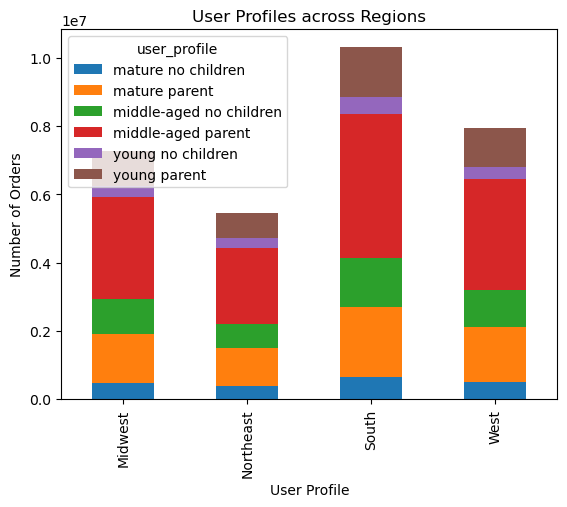

In [47]:
# Create a bar chart of results

bar_pro_reg = pro_reg.plot(kind="bar", stacked=True)
plt.title("User Profiles across Regions")
plt.xlabel("User Profile")
plt.ylabel("Number of Orders")

In [78]:
# Export bar chart as an image

bar_pro_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regions_profiles.png'), bbox_inches='tight')

### Compare customer profiles to department_ids

In [49]:
# Create a crosstab of customer profiles and department_ids

pro_dep = pd.crosstab(all['department_id'], all['user_profile'], dropna = False)

In [50]:
pro_dep

user_profile,mature no children,mature parent,middle-aged no children,middle-aged parent,young no children,young parent
department_id,,,,,,
1,141104,423146,291576,867688,96668,301549
10,2094,6851,4400,13692,1506,4908
11,28091,82961,58047,175667,20067,59473
12,44331,136819,90396,276851,31151,95233
13,115735,356648,244854,731275,83315,250878
14,42486,132810,92635,274804,31311,96804
15,64743,202766,138748,413647,47529,144641
16,338800,1029272,714524,2118308,241052,735226
17,45014,141616,93763,289064,32581,97819


Text(0, 0.5, 'Number of Orders')

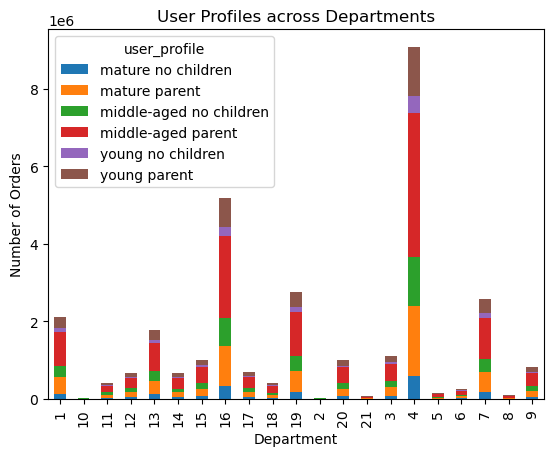

In [51]:
# Create a bar chart of results


bar_pro_dep = pro_dep.plot(kind="bar", stacked=True)
plt.title("User Profiles across Departments")
plt.xlabel("Department")
plt.ylabel("Number of Orders")

In [79]:
# Export bar chart as an image

bar_pro_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments_profiles.png'), bbox_inches='tight')

### I also created department groupings; let's see if that better illustrates the data

In [53]:
# Create a crosstab of customer profiles and departments

pro_dep_gr = pd.crosstab(all['user_profile'], all['department_group'], dropna = False)

In [54]:
pro_dep_gr

department_group,babies,drinks,food,household,misc,personal care,pets
user_profile,,,,,,,
mature no children,25892,177781,1730182,45014,8232,28091,6766
mature parent,80312,542932,5280842,141616,26574,82961,18349
middle-aged no children,56991,377488,3653393,93763,18077,58047,12346
middle-aged parent,169439,1112734,10843064,289064,53908,175667,37436
young no children,20445,126899,1236796,32581,6340,20067,4490
young parent,57313,378694,3743514,97819,19499,59473,13673


Text(0, 0.5, 'Number of Orders')

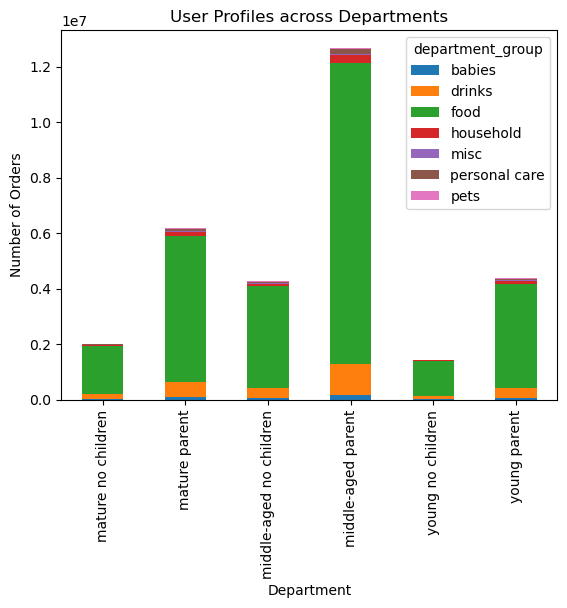

In [55]:
# Create a bar chart of results


bar_pro_dep_gr = pro_dep_gr.plot(kind="bar", stacked=True)
plt.title("User Profiles across Departments")
plt.xlabel("Department")
plt.ylabel("Number of Orders")

In [80]:
# Export bar chart as an image

bar_pro_dep_gr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_gr_profiles.png'), bbox_inches='tight')

### As when I was exploring the data, let's remove the food and see if we can find any insights.

In [57]:
# Drop food

dep_pro_no_food = pro_dep_gr.drop(columns = ['food'])

Text(0, 0.5, 'Number of Orders')

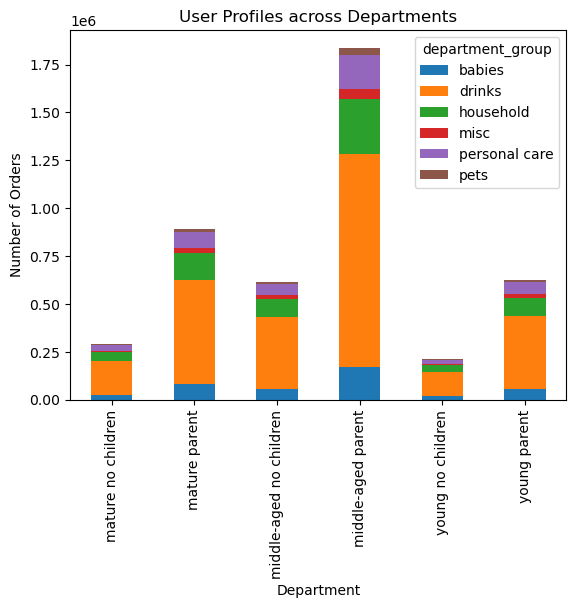

In [58]:
# Create a bar chart of results


bar_pro_dep_gr_no_food = dep_pro_no_food.plot(kind="bar", stacked=True)
plt.title("User Profiles across Departments")
plt.xlabel("Department")
plt.ylabel("Number of Orders")

In [81]:
# Export bar chart as an image

bar_pro_dep_gr_no_food.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_gr_profiles_no_food.png'), bbox_inches='tight')

### I couldn't find a link between region or department and user profile.  While there are variations; for instance middle-aged parents buy more drinks than young parents, this could just be because we have a lot more middle-aged parents as our customers than young parents.  I would need to investigate these numbers farther by doing some statistical analysis, since nothing jumps out.  The ratios for each region seem similar when looking at the stacked bar chart.  When looking by department, again, the ratios seem similar by each user-profile.

## 9. Produce suitable charts to illustrate your results and export them in your project folder.  

### The charts are above and have been exported.

## 10. Tidy up your script, export your final data set, and save your notebook.

In [60]:
# Export dataset


all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_V3.pkl'))

In [61]:
all.shape

(30964564, 38)

In [62]:
# Take one last look at dataframe to see if I need to drop any columns, tidy up

all.head()

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,type_spender,age_group,age_range,parent,income_range,department_group,user_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent


In [63]:
# Verifying that I can remove 'type_spender' exclusion flag; that the dataframe only includes the 'not low spender' flag and I didn't make a mistake somewhere.

all['type_spender'].value_counts(dropna = False)

not low spender    30964564
Name: type_spender, dtype: int64

In [64]:
all_1 = all.drop(columns = ['type_spender'])

In [65]:
# Can drop merge flag since it was just there to show me that the merge was successfull

all_1 = all.drop (columns = ['_merge'])

In [66]:
# Export final dataset without 'type_spender' and '_merge' columns


all_1.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_V4.pkl'))